In [1]:
import numpy as np

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
print(pd.ExcelFile('titanic3.xls'))

In [4]:
titanic3_df=pd.read_excel('titanic3.xls','titanic3', index_col=None,na_values=['NA'])

In [5]:
titanic3_df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [6]:
titanic3_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
pclass       1309 non-null int64
survived     1309 non-null int64
name         1309 non-null object
sex          1309 non-null object
age          1046 non-null float64
sibsp        1309 non-null int64
parch        1309 non-null int64
ticket       1309 non-null object
fare         1308 non-null float64
cabin        295 non-null object
embarked     1307 non-null object
boat         486 non-null object
body         121 non-null float64
home.dest    745 non-null object
dtypes: float64(3), int64(4), object(7)
memory usage: 107.4+ KB


In [7]:
titanic3_df.describe()

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413500,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


In [8]:
titanic3_df.drop(['ticket','cabin','boat','body'],axis=1).head()

,pclass,survived,name,sex,age,sibsp,parch,fare,embarked,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,211.3375,S,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,151.5500,S,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,151.5500,S,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,151.5500,S,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,151.5500,S,"Montreal, PQ / Chesterville, ON"


In [ ]:
titanic3_df.isnull()

In [ ]:
titanic3_df.isnull().sum

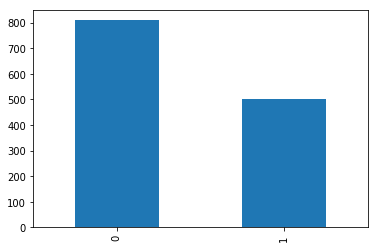

In [9]:
pd.value_counts(titanic3_df['survived']).plot.bar()

In [10]:
titanic3_df['survived'].mean()

0.3819709702062643

In [11]:
titanic3_df.groupby(['sex']).mean()

,pclass,survived,age,sibsp,parch,fare,body
sex,,,,,,,
female,2.154506,0.727468,28.687071,0.652361,0.633047,46.198097,166.62500
male,2.372479,0.190985,30.585233,0.413998,0.247924,26.154601,160.39823


In [12]:
titanic3_df.groupby(['sex','pclass']).mean()

survived        age     sibsp     parch        fare        body
sex    pclass                                                                 
female 1       0.965278  37.037594  0.555556  0.472222  109.412385         NaN
       2       0.886792  27.499191  0.500000  0.650943   23.234827   52.000000
       3       0.490741  22.185307  0.791667  0.731481   15.324250  183.000000
male   1       0.340782  41.029250  0.340782  0.279330   69.888385  162.828571
       2       0.146199  30.815401  0.327485  0.192982   19.904946  171.233333
       3       0.152130  25.962273  0.470588  0.255578   12.415462  151.854167

In [15]:
titanic3_df[titanic3_df['age']<18].groupby(['sex','pclass']).mean()

survived        age     sibsp     parch        fare   body
sex    pclass                                                            
female 1       0.875000  14.125000  0.500000  0.875000  104.083337    NaN
       2       1.000000   8.273150  0.666667  1.166667   27.998844    NaN
       3       0.543478   8.416667  1.456522  1.043478   18.284148  328.0
male   1       0.857143   9.845243  0.571429  1.714286  129.752371    NaN
       2       0.733333   6.222220  0.600000  0.933333   31.750280    NaN
       3       0.233333   9.838888  1.966667  1.016667   21.677570   65.5